In [190]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [191]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [192]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [193]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

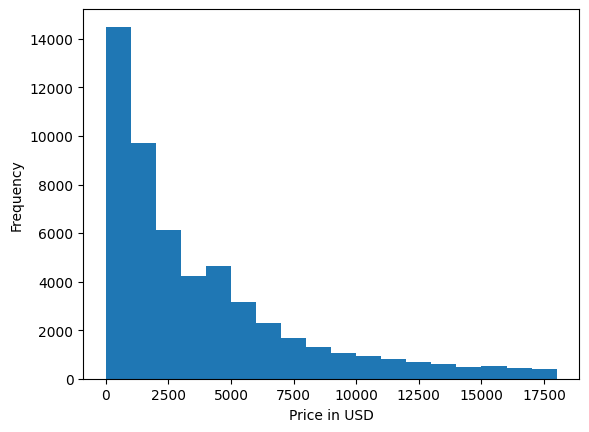

In [194]:
# univariate plot of diamond prices
bin_edges = np.arange(0, diamonds['price'].max()+1/4,1000)
plt.hist(data = diamonds, x = 'price', bins = bin_edges)
plt.xlabel("Price in USD")
plt.ylabel("Frequency")
plt.show()


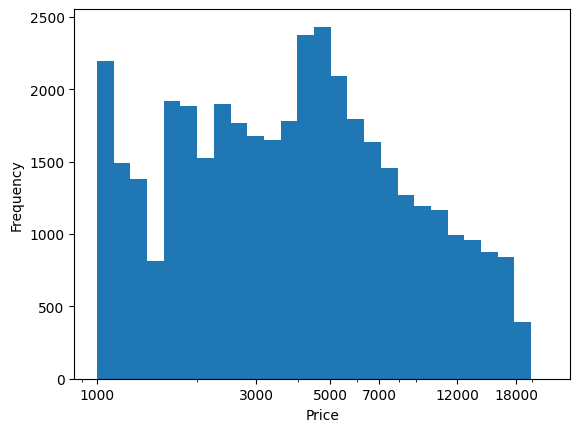

Text(0.5, 0, 'log(values)')

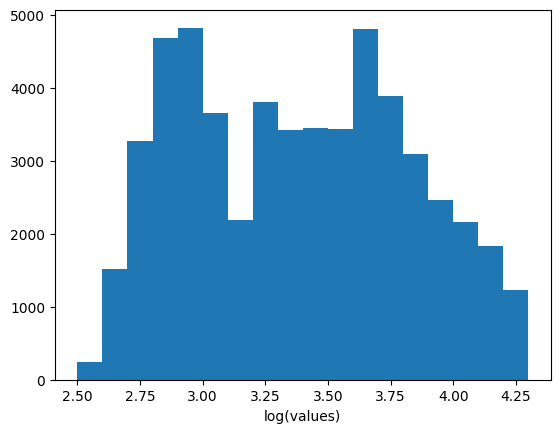

In [195]:
bin_edges = 10 ** np.arange(3, np.log10(diamonds['price'].max())+0.1, 0.05)
plt.hist(data = diamonds, x = 'price', bins = bin_edges)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xscale('log')
tick_locs = [1000, 3000,5000,7000,12000,18000]
plt.xticks(tick_locs, tick_locs)
plt.show()


log_data = np.log10(diamonds['price']) # direct data transform
log_bin_edges = np.arange(2.5, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

Price distribution comment: Looking at the price graph, the price increases as the frequency decreases. This makes sense as the more rare sommething is, the more value it has. Looking at the log graph, you can see that the data is bimodal. There is a large peak between 500 and 100 and another between 4000 and 5000.

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

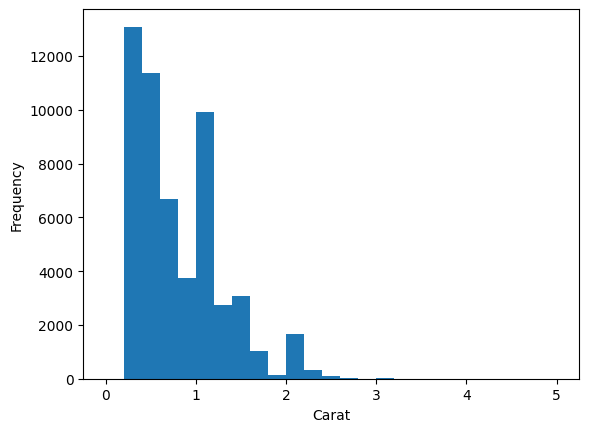

In [196]:
# univariate plot of carat weights
bin_edges = np.arange(0, diamonds['carat'].max(),.20)
plt.hist(data = diamonds, x = 'carat', bins = bin_edges)
plt.xlabel("Carat")
plt.ylabel("Frequency")
plt.show()

Carat distribution comment: 

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

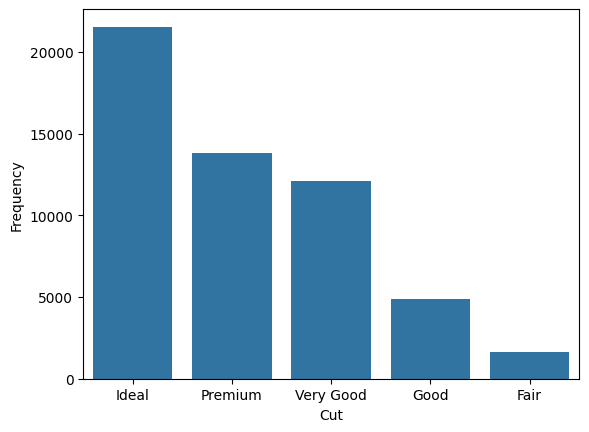

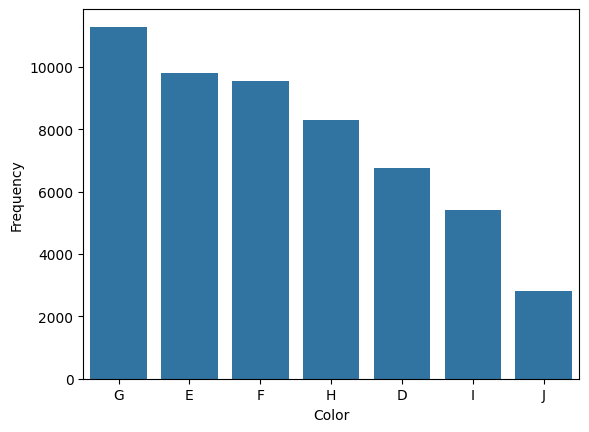

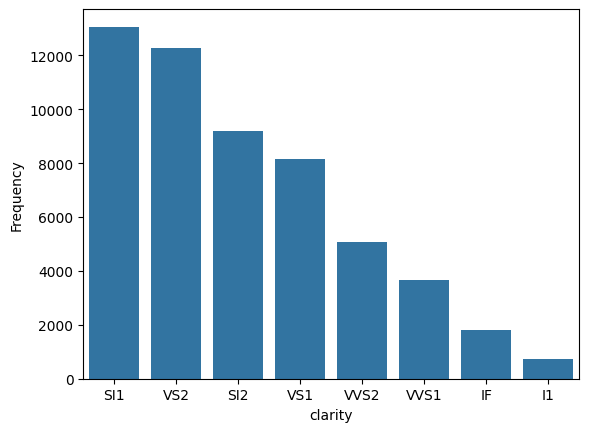

In [197]:
# univariate plots of cut, color, and clarity grades
base_color = sb.color_palette()[0]
cat_order = diamonds['cut'].value_counts().index
sb.countplot(data = diamonds, x = 'cut',color = base_color, order = cat_order)
plt.xlabel("Cut")
plt.ylabel("Frequency")
plt.show()
cat_order = diamonds['color'].value_counts().index
sb.countplot(data = diamonds, x = 'color',color = base_color, order = cat_order)
plt.xlabel("Color")
plt.ylabel("Frequency")
plt.show()
cat_order = diamonds['clarity'].value_counts().index
sb.countplot(data = diamonds, x = 'clarity',color = base_color, order = cat_order)
plt.xlabel("clarity")
plt.ylabel("Frequency")
plt.show()


General categorical feature comment:

Cut distribution comment: Based on the graph, we can see that more "ideal" cut diamonds are made. Clearly, better cut diamonds are more in demand than less ideal cuts as less ideal cuts decrease in frequency.

Color distribution comment: With the most common color grade in this data set being the central color grade, G, we can see that the data is mostly unimodal.

Clarity distribution comment: It is clear that the clarity grade data is right-skewed.Majority of diamonds collected have slight/very slight inlcusions. While there are relatively none with visible inclusions